In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
import os

In [3]:
def sensitivity_fun(alignment_err,acceptance_angle):
    
    first_term=1-0.1*np.power(np.abs(alignment_err),2)/acceptance_angle
    
    return np.maximum(0,first_term)

In [4]:
ae=np.linspace(-2,2,50)
g_func=sensitivity_fun(ae,0.1)

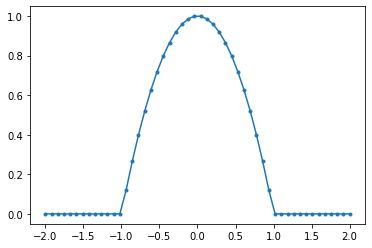

In [5]:
plt.plot(ae,g_func,'.-')

In [6]:
def corrected_isc(isc_0,delta_l0,delta_l1,tracker_offset,acceptance_angle):
    
    delta_l=np.sqrt(np.power(delta_l0,2)+np.power(delta_l1,2))
    isc=np.sqrt(isc_0*sensitivity_fun(delta_l+tracker_offset,acceptance_angle))
    return isc

In [7]:
corrected_isc(1,0.01,0.01,0.2,1)

0.9977045226794609

In [8]:
from pypvcircuit.spice_module_solver import ModuleErr

In [9]:
me=ModuleErr(0.4,-0.6,0.4,100,0.7)

In [10]:
cisc=me.get_isc(0.25)

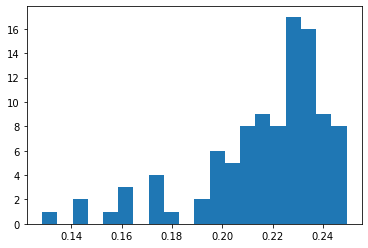

In [11]:
plt.hist(cisc,bins=20)
plt.show()